In [99]:
import geopandas
import pandas
import os
import zipfile
from numpy import random as random
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import box
shapefile_dir = '/home/idies/workspace/Temporary/raddick/jordanraddick.com_temp/natural-earth-vector/'

scale = 1
label_cities = False
label_city_populations = False

print('ok')

ok


In [40]:
for x in [x for x in os.listdir(shapefile_dir+'10m_cultural/') if '.zip' in x]:
    print(x)
    with zipfile.ZipFile(shapefile_dir+'10m_cultural/'+x, 'r') as zip_ref:
        zip_ref.extractall(shapefile_dir+'10m_cultural/')

for x in [x for x in os.listdir(shapefile_dir+'10m_physical/') if '.zip' in x]:
    print(x)
    with zipfile.ZipFile(shapefile_dir+'10m_physical/'+x, 'r') as zip_ref:
        zip_ref.extractall(shapefile_dir+'10m_physical/')
print('ok')

ne_10m_urban_areas.zip
ne_10m_admin_0_scale_rank_minor_islands.zip
ne_10m_populated_places.zip
ne_10m_cultural_building_blocks_all.zip
ne_10m_geography_marine_polys.zip
ne_10m_physical_building_blocks_all.zip
ne_10m_lakes.zip
ok


In [52]:
[x for x in os.listdir(shapefile_dir+'10m_cultural/') if '.shp' in x]

geo_units_gdf = geopandas.read_file(shapefile_dir+'10m_cultural/ne_10m_admin_0_scale_rank_minor_islands.shp')
places_gdf = geopandas.read_file(shapefile_dir+'10m_cultural/ne_10m_populated_places.shp')

# seams_0_gdf = geopandas.read_file(shapefile_dir+'10m_cultural/'+'ne_10m_admin_0_seams.shp')
# seams_1_gdf = geopandas.read_file(shapefile_dir+'10m_cultural/'+'ne_10m_admin_1_seams.shp')

# labels_0_gdf = geopandas.read_file(shapefile_dir+'10m_cultural/'+'ne_10m_admin_0_label_points.shp')
# labels_1_gdf = geopandas.read_file(shapefile_dir+'10m_cultural/'+'ne_10m_admin_1_label_points.shp')

#rivers_lakes_gdf = geopandas.read_file(shapefile_dir+'10m_physical/ne_10m_lakes.shp')

print('ok')
# places_gdf[places_gdf['ADM0NAME'] == 'Afghanistan'][
#     ['NAME', 'LATITUDE', 'LONGITUDE', 'POP_MAX']
# ]

ok


ok


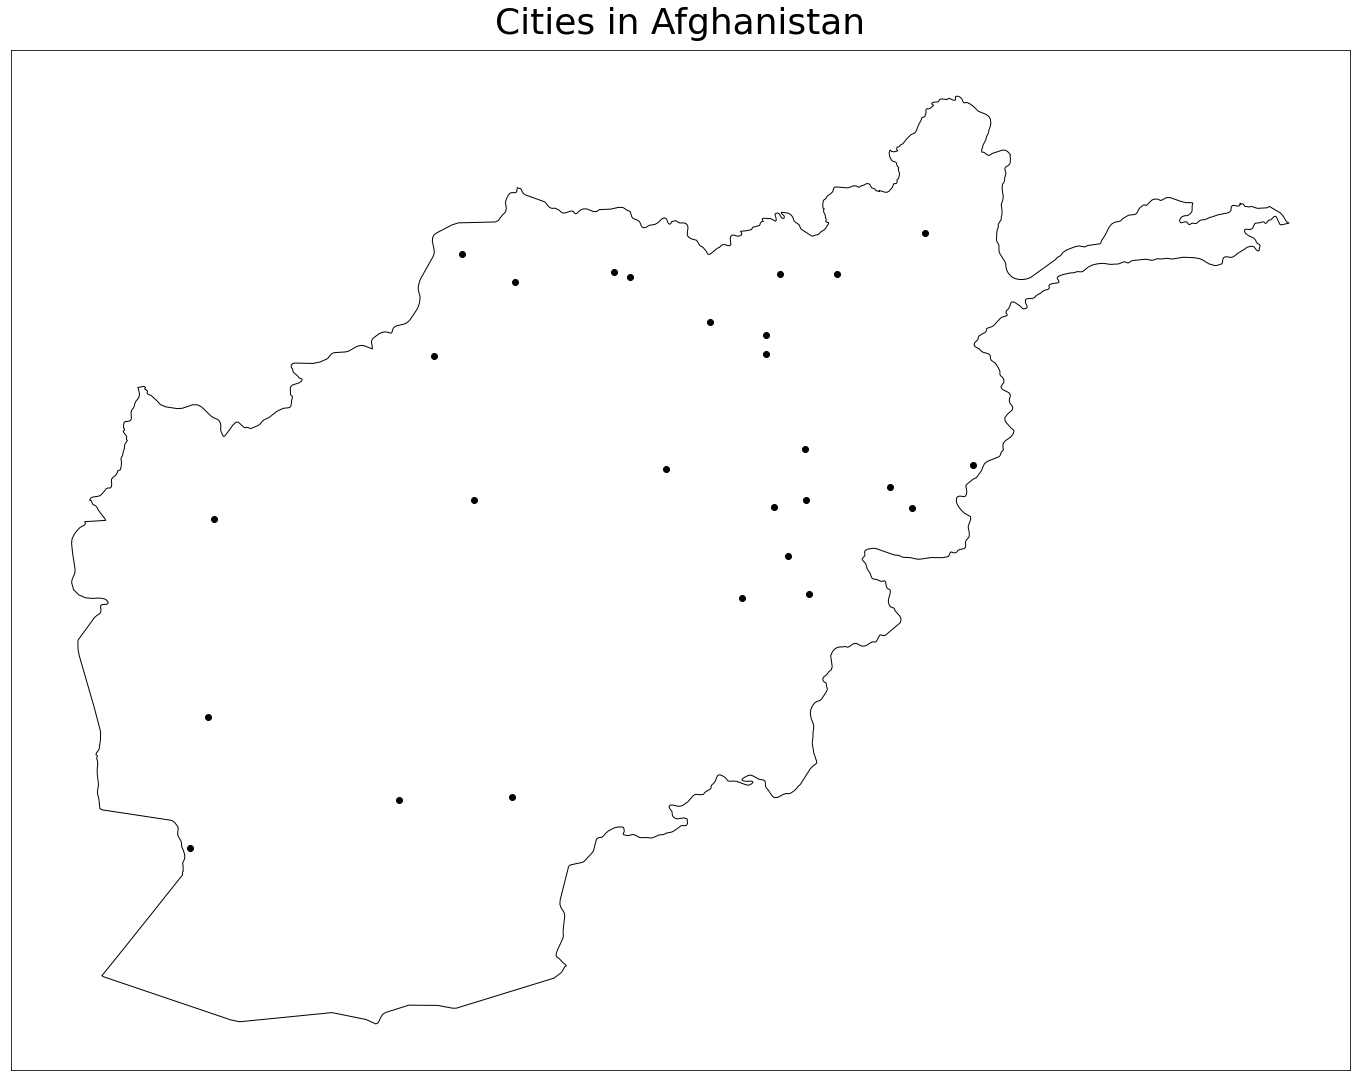

In [100]:
fig, ax = plt.subplots(1,1, figsize=(scale*24, scale*24/1.2))
ax.set_aspect('equal')
geo_units_gdf[geo_units_gdf['sr_subunit'] == 'Afghanistan'].plot(ax=ax, color='none', edgecolor='black')
places_gdf[
    (places_gdf['ADM0NAME'] == 'Afghanistan')
    & ((places_gdf['POP_MIN'] + places_gdf['POP_MAX'])/2 >= 15000)
].plot(ax=ax, color='black', 
#       markersize=places_gdf[(places_gdf['ADM0NAME'] == 'Afghanistan') & (places_gdf['POP_MAX'] >= 15000)]['POP_MAX'].apply(lambda x: 5*np.log2(x))
      )
if (label_cities):
    for ix, thisrow in places_gdf[
        (places_gdf['ADM0NAME'] == 'Afghanistan')
        & ((places_gdf['POP_MIN'] + places_gdf['POP_MAX'])/2 >= 15000)
    ].iterrows():
        if (label_city_populations):
            annotator = '{0:} ({1:,.0f})'.format(thisrow['NAME'], (thisrow['POP_MIN'] + thisrow['POP_MAX']) / 2)
        else:
            annotator = '{0:}'.format(thisrow['NAME'])
        if (thisrow['NAME'] in ['Herat', 'Meymaneh', 'Baghlan', 'Kandahar']):
            shiftor = (0.1, 0)
            halignor = 'left'
        elif (thisrow['NAME'] in ['Andkhvoy', 'Mayda Shahr', 'Aybak', 'Baraki Barak']):
            shiftor = (-0.1, 0)
            halignor = 'right'
        elif (thisrow['NAME'] in ['Balkh']):
            shiftor = (0.3, -0.2)
            halignor = 'left'
        elif (thisrow['NAME'] in ['Taloqan']):
            shiftor = (0, -0.2)
            halignor = 'left'
        elif (thisrow['NAME'] in ['Kabul']):
            annotator = '{0:}\n({1:,.0f})'.format(thisrow['NAME'], (thisrow['POP_MIN'] + thisrow['POP_MAX']) / 2)
            shiftor = (0.3, -0.25)
            halignor = 'center'
        elif (thisrow['NAME'] in ['Jalalabad', 'Kondoz']):
            #annotator = ''
            shiftor = (0, 0.175)
            halignor = 'left'
        elif (thisrow['NAME'] in ['Ghazni', 'Pol-e Khomri']):
            shiftor = (0, -0.15)
            halignor = 'center'
        elif (thisrow['NAME'] in ['Sheberghan']):
            shiftor = (-0.1, -0.15)
            halignor = 'center'
        elif (thisrow['NAME'] == 'Mehtar Lam'):
            shiftor = (-0.1, 0.1)
            halignor = 'right'
        elif (thisrow['NAME'] == 'Mazar-e Sharif'):
            shiftor = (0, 0.2)
            halignor = 'center'
        else:
            shiftor = (0, 0.15)
            halignor = 'center'
        ax.annotate(
            annotator, 
            (thisrow['LONGITUDE'], thisrow['LATITUDE']), (thisrow['LONGITUDE'] + shiftor[0], thisrow['LATITUDE'] + shiftor[1]), #(thisrow['LONGITUDE'] + ((random.rand() - 0.5) / 1.5), thisrow['LATITUDE'] + ((random.rand() - 0.5) / 1.5)), 
            size=16*scale, va='center', ha=halignor, backgroundcolor='white'#, bbox=dict(facecolor='none', edgecolor='red')
        )
        
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

plt.title('Cities in Afghanistan', size=36*scale, y=1.01)
#plt.xticks(size=18*scale)
#plt.yticks(size=18*scale)


#plt.show()
plt.savefig('afghanistan_unlabeled.svg', format='svg')
print('ok')

In [85]:
os.getcwd()

'/home/idies/workspace/Storage/raddick/jordanraddick.com'